In [1]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [2]:
model_name = "3task_0305"
num_runs = 3
test_trials = 500
iter_list = np.arange(0,61000,1000)#[3200, 4800, 6400, 9600, 12800]#, 200, 300, 400, 600, 800, 1200]#, 1600, 2400, 3200, 4800, 6400, 9600, 12800, 19200, 25600, 38400, 51200, 76800, 102400]#, 153600, 204800, 307200, 409600, 614400, 819200, 1000000]
            #[0, 400, 800, 1600, 3200, 6400, 12800, 25600]#, 51200, 76800, 102400]#, 153600, 204800, 307200, 409600, 614400, 819200, 1000000, 2000000, 3000000, 4000000]
             #[0, 1000, 4000, 16000, 32000, 64000, 125000, 250000, 500000, 600000]
#iter_list = np.arange(0,11100000,100000)
glimpse_list = np.arange(0,10,1)
max_blobs = 9
min_blobs = 1

num_iters = len(iter_list)
num_glimpses = len(glimpse_list)
blob_list = np.arange(0,10,1)
output_size = max_blobs - min_blobs + 2 # 10
data_directory = "data/" + model_name + "/"
m = 0.5
num_imgs = test_trials*(output_size-1)

In [3]:
threetask_count_results_hist = np.load(data_directory + "count_results_hist.npy")
threetask_count_class_hist = np.load(data_directory + "count_class_hist.npy")
threetask_high_cot_hist = np.load(data_directory + "high_cot_2_hist.npy")
threetask_count_accuracy_hist = np.load(data_directory + "count_accuracy_hist.npy")
threetask_point_results_hist = np.load(data_directory + "point_results_hist.npy")
threetask_point_accuracy_hist = np.load(data_directory + "point_accuracy_hist.npy")
threetask_error_hist = np.load(data_directory + "error_hist.npy")

# Count Analysis

In [ ]:
# Count Table
def plot_count_results_wv(self, run, it):
    """Plot the count heatmap with values."""
    data = self[run, it]
    title = "Count at Run %d after %d Iters" % (run + 1, iter_list[it])
    xlabel= "Count Results"
    ylabel="True Class"
    plt.figure(figsize=(output_size+1, output_size-1))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    c = plt.pcolor(data, edgecolors='k', linewidths=2, cmap='Reds', vmin=0, vmax=test_trials)
    xbars = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'NWF')
    x_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
    plt.xticks(x_pos, xbars, fontsize='10', horizontalalignment='center')
    ybars = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
    y_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
    plt.yticks(y_pos, ybars, fontsize='10', horizontalalignment='center')
 
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            color = (0.0, 0.0, 0.0) # value color
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

    show_values(c)
    plt.colorbar(c)

In [ ]:
for run in range(num_runs):
    for it in range(num_iters):
        plot_count_results_wv(threetask_count_results_hist,run,it)

In [ ]:
# Highest count
def plot_highest_count(self,run):
    """Plot the highest count."""
    x = iter_list
    y = self[run]
    plot_title = "The highest count at Run %d" % (run + 1)
    plt.title(plot_title)
    plt.plot(x, y, '.-', color='r')
    plt.axis([iter_list[0]-test_trials, iter_list[num_iters-1]+test_trials, 0, 10])
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.xlabel('Iteration')
    plt.ylabel('Highest count word')
    plt.show()

In [ ]:
for run in range(num_runs):
    plot_highest_count(threetask_high_cot_hist, run)

In [10]:
# Average highest count
def plot_hc_avg(smu,smin,smax):
    fig, ax = plt.subplots(1, 1)
    plt.rcParams["figure.figsize"] = [8,5]
    x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
    fig.tight_layout()
    tstr = 'The highest count of 3Tasks (modified)'
    ax.set_title(tstr, fontsize=25)
    ax.plot(x,smu,'k-')
    ax.fill_between(x,smin,smax, facecolor='orange')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0,42000)
    plt.show()

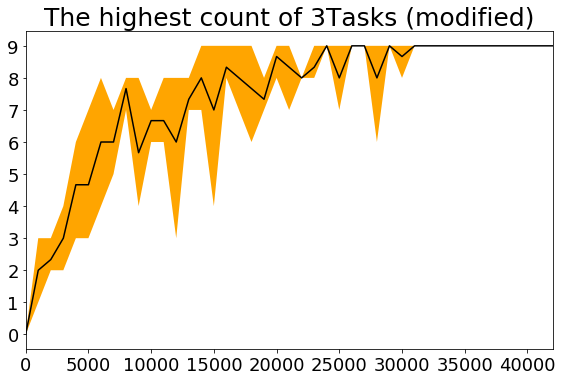

In [11]:
hc_mu = np.mean(threetask_high_cot_hist,axis=0)
hc_min = np.min(threetask_high_cot_hist,axis=0)
hc_max = np.max(threetask_high_cot_hist,axis=0)
plot_hc_avg(hc_mu,hc_min,hc_max)

In [22]:
# Count Accuracy
def plot_count_accuracy(self):
    """Plot the count accuracy."""
    for i in range(num_runs):
        fig, axs = plt.subplots(1, 1)
        plt.rcParams["figure.figsize"] = [10,6]
        x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
        y1 = self[i,0]
        y2 = self[i,1]
        y3 = self[i,2]
        y4 = self[i,3]
        y5 = self[i,4]
        y6 = self[i,5]
        y7 = self[i,6]
        y8 = self[i,7]
        y9 = self[i,8]
        l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs.plot(x, y1, 'ro-', x, y2, 'bs-', x, y3, 'g^-', x, y4, 'c.-', x, y5, 'ms-', x, y6, 'y^-', x, y7, 'k.-', x, y8, 'cs-', x, y9, 'r^-')

        fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
        plot_title = "Count Performance at Run %d" % (i + 1)
        plt.title(plot_title, fontsize=15)

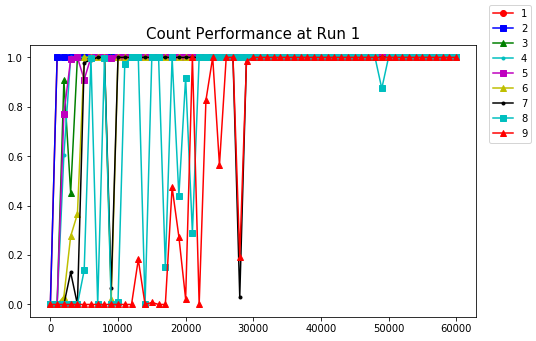

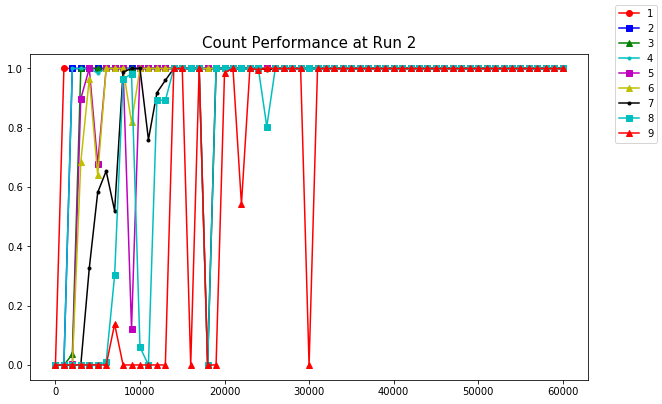

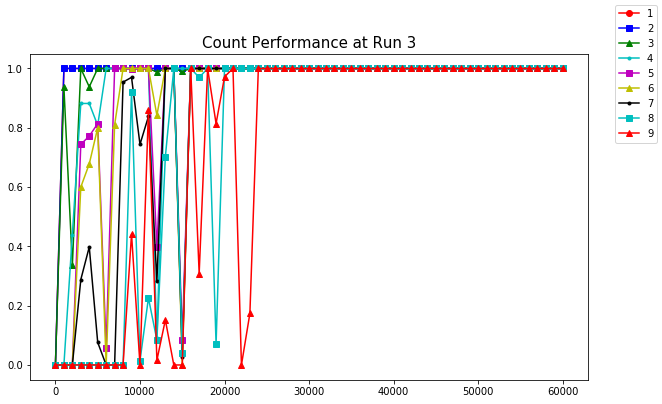

In [13]:
plot_count_accuracy(threetask_count_accuracy_hist)

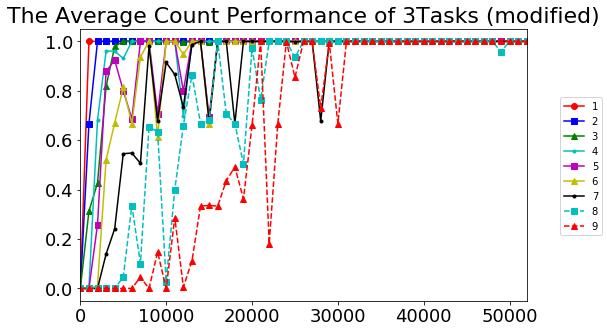

In [23]:
# Average count Accuracy
def plot_count_accuracy_avg(self):
    """Plot the count accuracy."""
    fig, axs = plt.subplots(1, 1)
    plt.rcParams["figure.figsize"] = [10,6]
    x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
    self_avg = np.mean(self,axis=0)
    y1 = self_avg[0]
    y2 = self_avg[1]
    y3 = self_avg[2]
    y4 = self_avg[3]
    y5 = self_avg[4]
    y6 = self_avg[5]
    y7 = self_avg[6]
    y8 = self_avg[7]
    y9 = self_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs.plot(x, y1, 'ro-', x, y2, 'bs-', x, y3, 'g^-', x, y4, 'c.-', x, y5, 'ms-', x, y6, 'y^-', x, y7, 'k.-', x, y8, 'cs--', x, y9, 'r^--')

    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'center right')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0,52000)
    plot_title = "The Average Count Performance of 3Tasks (modified)" 
    plt.title(plot_title, fontsize=22)
        
plot_count_accuracy_avg(threetask_count_accuracy_hist)

# Point Analysis

In [ ]:
# Point Table
def plot_point_results_wv(self, run, it):
    """Plot the point heatmap with values."""
    data = self[run, it]
    title = "Point at Run %d after %d Iters" % (run + 1, iter_list[it])
    xlabel= "Point Results"
    ylabel="True Class"
    plt.figure(figsize=(output_size, output_size-1))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    c = plt.pcolor(data, edgecolors='k', linewidths=2, cmap='Reds', vmin=0, vmax=test_trials)
    xbars = ('1', '2', '3', '4', '5', '6', '7', '8', '9', 'NWF')
    x_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
    plt.xticks(x_pos, xbars, fontsize='10', horizontalalignment='center')
    ybars = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
    y_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
    plt.yticks(y_pos, ybars, fontsize='10', horizontalalignment='center')
 
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            color = (0.0, 0.0, 0.0) # value color
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

    show_values(c)
    plt.colorbar(c)

In [ ]:
for run in range(num_runs):
    for it in range(num_iters):
        plot_point_results_wv(threetask_point_results_hist,run,it)

In [20]:
# How high the network can poimt?
high_pot = np.zeros([num_runs, num_iters]) 
for i in range(num_runs):
    for j in range(num_iters):
        k=0
        while (k<output_size-1): 
            if threetask_point_results_hist[i][j][k][k]/test_trials>=0.9:
                high_pot[i][j]+=1
                k+=1
            else:
                k=output_size

# Average highest point
def plot_hc_avg(smu,smin,smax):
    fig, ax = plt.subplots(1, 1)
    plt.rcParams["figure.figsize"] = [8,5]
    x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
    fig.tight_layout()
    tstr = 'The highest point of 3Tasks (modified)'
    ax.set_title(tstr, fontsize=25)
    ax.plot(x,smu,'k-')
    ax.fill_between(x,smin,smax, facecolor='orange')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0,50000)
    plt.show()

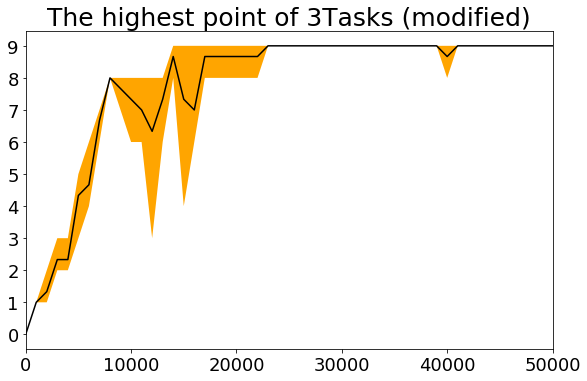

In [21]:
hc_mu = np.mean(high_pot,axis=0)
hc_min = np.min(high_pot,axis=0)
hc_max = np.max(high_pot,axis=0)
plot_hc_avg(hc_mu,hc_min,hc_max)

In [25]:
# Point Accuracy
def plot_point_accuracy(self):
    """Plot the point accuracy."""
    for i in range(num_runs):
        fig, axs = plt.subplots(1, 1)
        plt.rcParams["figure.figsize"] = [10,6]
        x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
        y1 = self[i,0]
        y2 = self[i,1]
        y3 = self[i,2]
        y4 = self[i,3]
        y5 = self[i,4]
        y6 = self[i,5]
        y7 = self[i,6]
        y8 = self[i,7]
        y9 = self[i,8]
        l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs.plot(x, y1, 'ro-', x, y2, 'bs-', x, y3, 'g^-', x, y4, 'c.-', x, y5, 'ms-', x, y6, 'y^-', x, y7, 'k.-', x, y8, 'cs--', x, y9, 'r^--')

        fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'center right')
        plot_title = "Point Performance at Run %d" % (i + 1)
        plt.title(plot_title, fontsize=15)

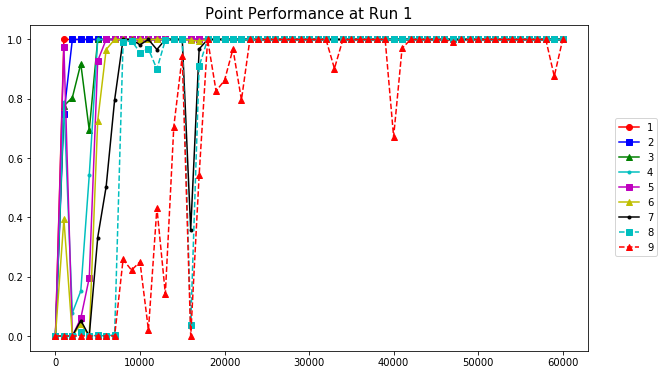

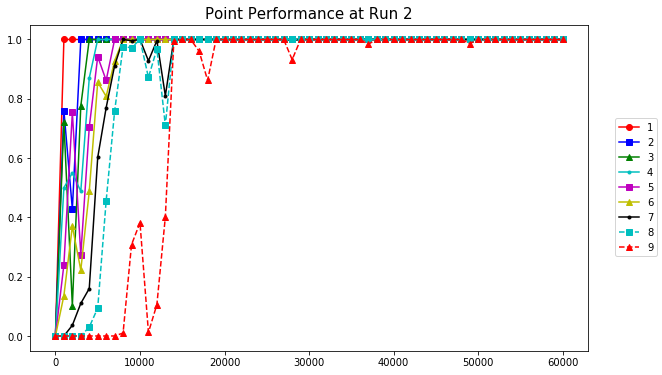

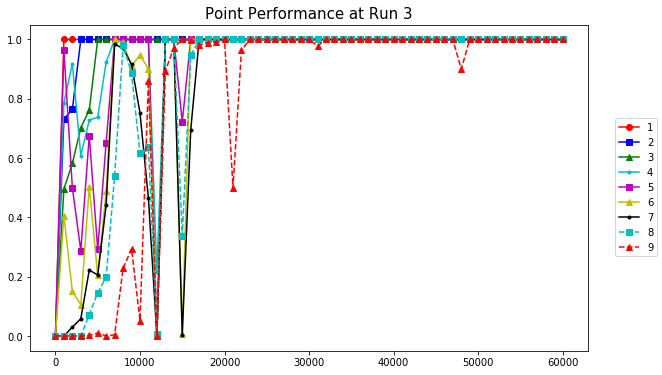

In [26]:
plot_point_accuracy(threetask_point_accuracy_hist)

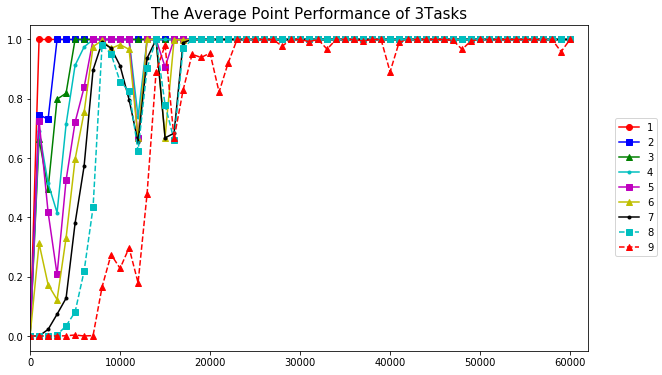

In [24]:
# Average point Accuracy
def plot_point_accuracy_avg(self):
    """Plot the point accuracy."""
    fig, axs = plt.subplots(1, 1)
    plt.rcParams["figure.figsize"] = [10,6]
    x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
    self_avg = np.mean(self,axis=0)
    y1 = self_avg[0]
    y2 = self_avg[1]
    y3 = self_avg[2]
    y4 = self_avg[3]
    y5 = self_avg[4]
    y6 = self_avg[5]
    y7 = self_avg[6]
    y8 = self_avg[7]
    y9 = self_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs.plot(x, y1, 'ro-', x, y2, 'bs-', x, y3, 'g^-', x, y4, 'c.-', x, y5, 'ms-', x, y6, 'y^-', x, y7, 'k.-', x, y8, 'cs--', x, y9, 'r^--')
    plt.xlim(0,62000)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'center right')
    plot_title = "The Average Point Performance of 3Tasks" 
    plt.title(plot_title, fontsize=15)
        
plot_point_accuracy_avg(threetask_point_accuracy_hist)

# Coding Types of Errors

In [ ]:
def plot_error_percent(self, run, it):
    """Plot the error categories."""
    N = 8
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p = plt.bar(ind, self[run, it]/num_imgs, width)
    plt.ylabel('Percent of Trials with Error Made')
    plt.title('Errors Made at Run %d after %d Iters' % (run + 1, iter_list[it]))
    plt.xticks(ind, ('Correct', 'String Error', 'Done Error', 'Skip', 'Stop Short', 'Double Count', 'Continue', 'Others'), rotation=30)
    plt.yticks(np.arange(0, 1, 100))
    for a,b in zip(ind, self[run, it]/num_imgs):
        plt.text(a, b+0.005, '%.3f' % b, ha='center', va= 'bottom',fontsize=10)
    plt.show()

In [ ]:
for run in range(num_runs):
    for it in range(num_iters):
        plot_error_percent(threetask_error_hist,run,it)